In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras import datasets, layers, models


In [26]:
(training_images,training_labels),(testing_images, testing_labels)=datasets.cifar10.load_data()

In [27]:
#images are in the form of array, and each pixels are range from 0-255, 
#labels are the images like image of birds and all. 

In [28]:
training_images,testing_images=training_images/255,testing_images/255

In [29]:
class_names=["Plane","Car","Bird","Cat","Deer","Dog","Frog","Horse","ship","Truck"]

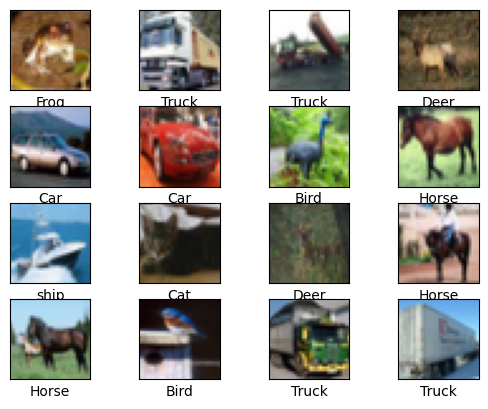

In [30]:
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],  cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
plt.show()

In [31]:
training_images=training_images[:20000]
training_labels=training_labels[:20000]
testing_images  =testing_images[:4000]
testing_labels=testing_labels[:4000]

In [32]:


# input layer is conv layer, which is basically have 32 in nurons, in 3*3 forms, basically it help to take the features.

In [33]:
#everytime u have the conv layer u must have maxpooling layer, it basically help toh get the simplfy the result, nd use to get only essential result. 

In [37]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.Flatten())
#it will just flatten the input into the 1D
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# softmax basically scale the level so that they are equal, and can be add upto 1
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(training_images,training_labels, epochs=10, validation_data=(testing_images,testing_labels))
#epochs will basically say how many time it will going to see the same data.

loss, accuracy=model.evaluate(testing_images,testing_labels)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.2768 - loss: 1.9337 - val_accuracy: 0.4543 - val_loss: 1.5366
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.4858 - loss: 1.4267 - val_accuracy: 0.5055 - val_loss: 1.3673
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5539 - loss: 1.2486 - val_accuracy: 0.5577 - val_loss: 1.2302
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5980 - loss: 1.1309 - val_accuracy: 0.5947 - val_loss: 1.1262
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6328 - loss: 1.0470 - val_accuracy: 0.6240 - val_loss: 1.0658
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6721 - loss: 0.9469 - val_accuracy: 0.6223 - val_loss: 1.0516
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6951 - loss: 0.8677 - val_accuracy: 0.6513 - val_loss: 1.0070
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7179 - loss: 0.8119 - 

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=image_classifier.modal.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
prediction is Plane


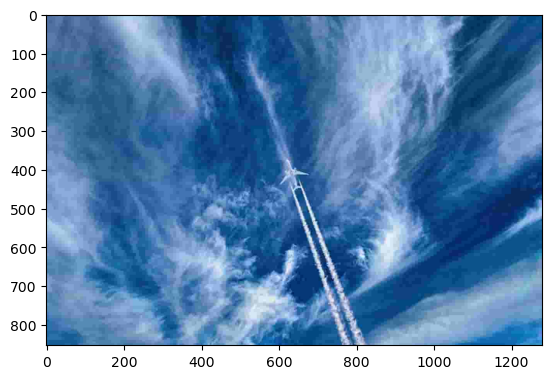

In [47]:
model.save('image_classifier.keras')

models.load_model("image_classifier.keras")
img=cv.imread("plane-7432680_1280-min.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
img = cv.resize(img, (32, 32))
prediction = model.predict(np.array([img])/ 255)
# this will give us the 10 activation of softmax neuron
index = np.argmax(prediction)

#argmax will give the index of the maximum value

print(f"prediction is {class_names[index]}")
